**MNIST Handwritten Digit Classification Using Neural Networks**

In [2]:
## Importing necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [3]:
## Loading the data

(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
## Shape of numpy arrays
print((X_train.shape, Y_train.shape), (X_test.shape,Y_test.shape))

((60000, 28, 28), (60000,)) ((10000, 28, 28), (10000,))


Training Data = 60,000 Images

Test Data = 10,000 Images


---


Image Dimensions --> 28x28

Grayscale Image --> 1 Channel

In [5]:
## Printing the 12th image
print(X_train[13])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 222
  225   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 147 234 252
  176   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  23 197 253 252 208
   19   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  38 178 252 253 117  65
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  57 252 252 253  89   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38 222 253 253  79   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 131 252 179  27   

In [6]:
## Shape of hte image
print(X_train[13].shape)

(28, 28)


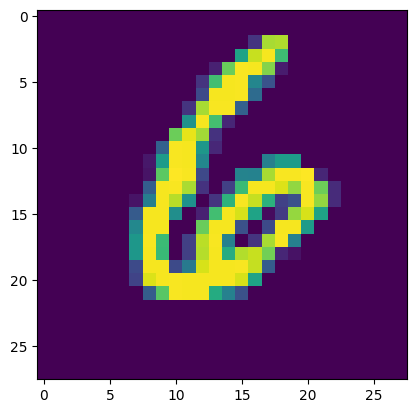

6


In [8]:
## Displaying Image

plt.imshow(X_train[13])
plt.show()

## Print the corresponding label
print(Y_train[13])

**Image Labels**

In [10]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [11]:
## Unique values in Y_train
print(np.unique(Y_train))

## Unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**We can use these labels as such or we can also apply One Hot Encoding.**



---
All the images have same dimensions in this dataset. If not, we have to resize all the images to a common dimension.

In [12]:
## Scaling the values

X_train = X_train/255
X_test = X_test/255

In [13]:
print(X_train[13])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.14901961 0.87058824
  0.88235294 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.       



---

**Building a Neural Network**

In [15]:
## Setting up the layers of NN

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)), #Grayscale Image
                          keras.layers.Dense(50, activation='relu'), # Hidden layer
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid') #Output Layer/Neural
])

**Compiling The Neural Network**

In [20]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

**Training The Neural Network**

In [21]:
model.fit(X_train,Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.3055 - accuracy: 0.9120
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1422 - accuracy: 0.9581
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1060 - accuracy: 0.9679
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0849 - accuracy: 0.9735
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0701 - accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0604 - accuracy: 0.9805
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0529 - accuracy: 0.9830
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0446 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0397 - accuracy: 0.9870
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.035

Training Data Accuracy = **98.9%**

In [23]:
## Accuracy for Test Data

loss, accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.1166 - accuracy: 0.9712
0.9711999893188477


Test Data Accuracy = **97.11%**

In [24]:
print(X_test.shape)

(10000, 28, 28)


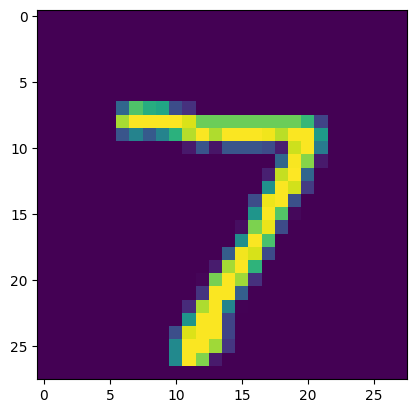

In [25]:
## First data point in X_test
plt.imshow(X_test[0])
plt.show()

In [26]:
print(Y_test[0])

7


In [29]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [30]:
print(Y_pred.shape)

(10000, 10)


In [31]:
## What's this 10? --> For each data point there are 10 values
print(Y_pred[0])

[2.7049952e-03 1.6870105e-01 5.8127757e-02 1.9845936e-01 1.2782680e-08
 8.5681928e-03 2.4104456e-06 9.9999881e-01 7.5858845e-03 4.5670655e-01]


*`model.predict()` gives the prediction probability of each class for that data point*

**Converting the prediction probabilities to class labels.**

In [33]:
label_for_first_img = np.argmax(Y_pred[0])   ## np.argmax will tell the index of the max value
print(label_for_first_img)


7


In [36]:
label_for_fifth_img = np.argmax(Y_pred[4])   ## np.argmax will tell the index of the max value
print(label_for_fifth_img)


4


**Converting the prdiction probabbilities to class labels for all test data.**

In [37]:
y_pred_labels = [np.argmax(i) for i in Y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 9, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

---
**Building The Confusion Matrix**


In [38]:
conf_matrix = confusion_matrix(Y_test,y_pred_labels)

In [39]:
print(conf_matrix)

tf.Tensor(
[[ 941    0    1    2    2   13    9    4    4    4]
 [   0 1123    4    0    0    3    2    2    1    0]
 [   5    3  998    3    4    2    2    9    5    1]
 [   0    1    5  971    0    9    0   12    7    5]
 [   0    1    3    1  962    1    4    3    0    7]
 [   0    0    0    7    2  875    3    1    1    3]
 [   0    1    1    0    5    6  944    1    0    0]
 [   1    0    9    2    0    0    0 1007    2    7]
 [   2    0    3    5    4   13    1   10  929    7]
 [   0    2    0    2   21    5    2   14    2  961]], shape=(10, 10), dtype=int32)


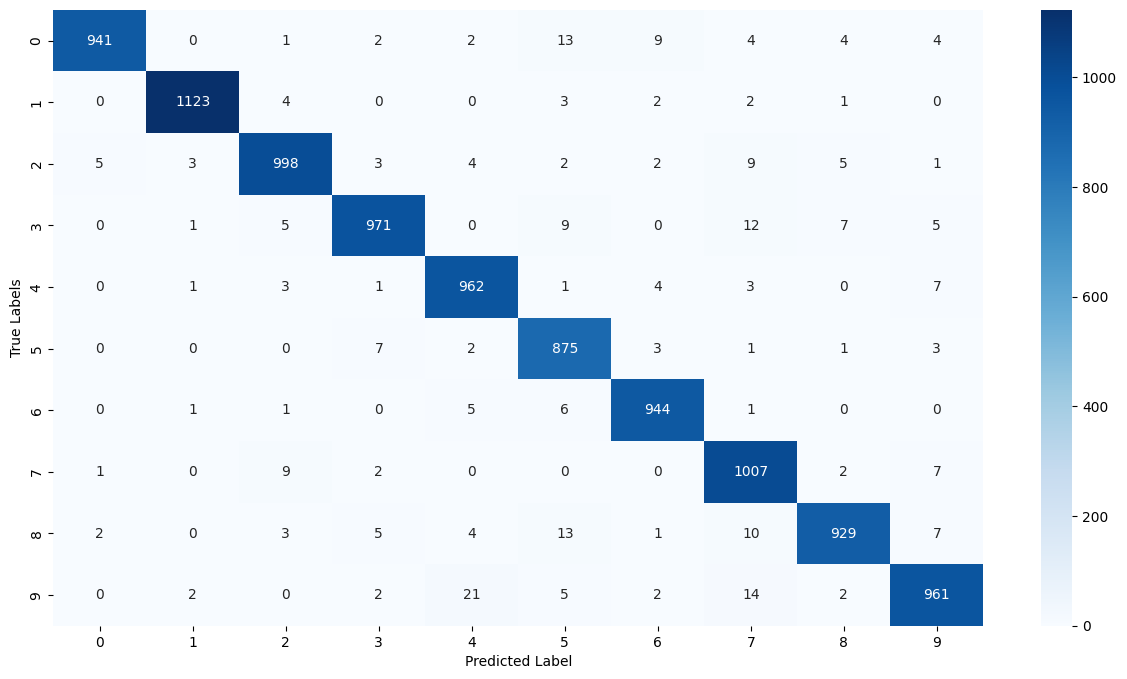

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Label')
plt.show()

*   `941` Images of `0` have been predicted correctly.
*   `1123` Images of `1` have been predicted correctly.
*    So on...

---
**Building a Predictive System**


In [42]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [43]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

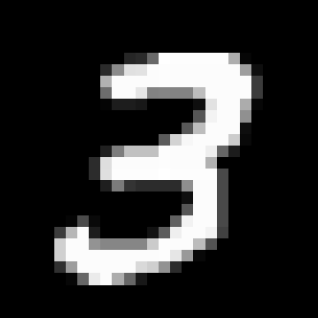

In [45]:
cv2_imshow(input_image)

In [46]:
input_image.shape

(318, 318, 3)

In [47]:
## Convert the image from RGB to Grayscale and reduce the dimension
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [49]:
grayscale.shape

(318, 318)

In [50]:
## Image Resize
input_image_resize = cv2.resize(grayscale, (28,28))

In [51]:
input_image_resize.shape

(28, 28)

In [52]:
cv2_imshow(input_image_resize)

In [53]:
input_image_resize = input_image_resize/255 ## Scaling down the value

In [55]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [56]:
input_pred = model.predict(image_reshaped)
print(input_pred)

1/1 [==============================] - 0s 38ms/step
[[1.5385941e-13 2.4850029e-04 7.7551122e-05 1.0000000e+00 2.9750181e-11
  1.4346364e-01 1.9845078e-12 1.3575967e-02 1.2132330e-03 1.9112809e-01]]


In [57]:
input_pred_label = np.argmax(input_pred)

In [58]:
print(input_pred_label)

3


#**Predictive System**

Path of the image to be predicted: /content/MNIST_digit.png


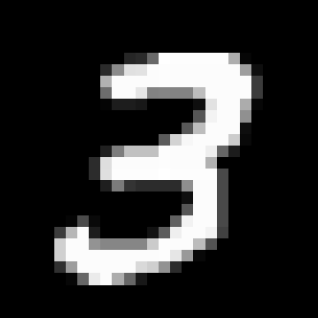

1/1 [==============================] - 0s 22ms/step
The Handwritten Digit is recognised as 3


In [60]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_pred = model.predict(image_reshaped)

input_pred_label = np.argmax(input_pred)

print('The Handwritten Digit is recognised as', input_pred_label)